In [1]:
import numpy as np  
import pandas as pd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly
import plotly.express as px

In [2]:
with open('Europe.json', encoding="utf-8") as f: 
    datos = json.load(f)

In [3]:
df1 = pd.read_csv("2015.csv")
df1

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [4]:
df = df1[df1["Region"].isin(["Central and Eastern Europe","Western Europe"])]
df

Country                      Region  Happiness Rank  \
0               Switzerland              Western Europe               1   
1                   Iceland              Western Europe               2   
2                   Denmark              Western Europe               3   
3                    Norway              Western Europe               4   
5                   Finland              Western Europe               6   
6               Netherlands              Western Europe               7   
7                    Sweden              Western Europe               8   
12                  Austria              Western Europe              13   
16               Luxembourg              Western Europe              17   
17                  Ireland              Western Europe              18   
18                  Belgium              Western Europe              19   
20           United Kingdom              Western Europe              21   
25                  Germany              Western Europe              26   
28                   France              Western Europe              29   
30           Czech Republic  Central and Eastern Europe              31   
35                    Spain              Western Europe              36   
36                    Malta              Western Europe              37   
43               Uzbekistan  Central and Eastern Europe              44   
44                 Slovakia  Central and Eastern Europe              45   
49                    Italy              Western Europe              50   
51                  Moldova  Central and Eastern Europe              52   
53               Kazakhstan  Central and Eastern Europe              54   
54                 Slovenia  Central and Eastern Europe              55   
55                Lithuania  Central and Eastern Europe              56   
58                  Belarus  Central and Eastern Europe              59   
59                   Poland  Central and Eastern Europe              60   
61                  Croatia  Central and Eastern Europe              62   
63                   Russia  Central and Eastern Europe              64   
65             North Cyprus              Western Europe              66   
66                   Cyprus              Western Europe              67   
68                   Kosovo  Central and Eastern Europe              69   
69             Turkmenistan  Central and Eastern Europe              70   
72                  Estonia  Central and Eastern Europe              73   
76               Kyrgyzstan  Central and Eastern Europe              77   
79               Azerbaijan  Central and Eastern Europe              80   
82               Montenegro  Central and Eastern Europe              82   
85                  Romania  Central and Eastern Europe              86   
86                   Serbia  Central and Eastern Europe              87   
87                 Portugal              Western Europe              88   
88                   Latvia  Central and Eastern Europe              89   
92                Macedonia  Central and Eastern Europe              93   
94                  Albania  Central and Eastern Europe              95   
95   Bosnia and Herzegovina  Central and Eastern Europe              96   
101                  Greece              Western Europe             102   
103                 Hungary  Central and Eastern Europe             104   
105              Tajikistan  Central and Eastern Europe             106   
110                 Ukraine  Central and Eastern Europe             111   
126                 Armenia  Central and Eastern Europe             127   
129                 Georgia  Central and Eastern Europe             130   
133                Bulgaria  Central and Eastern Europe             134   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884        

In [5]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count       50.000000        50.000000       50.000000   
mean        58.220000         5.902740        0.042023   
std         36.939161         0.959684        0.010104   
min          1.000000         4.218000        0.018480   
25%         26.750000         5.123250        0.035327   
50%         59.500000         5.802000        0.041715   
75%         86.750000         6.706250        0.048215   
max        134.000000         7.587000        0.069130   

       Economy (GDP per Capita)     Family  Health (Life Expectancy)  \
count                 50.000000  50.000000                 50.000000   
mean                   1.092024   1.134631                  0.798731   
std                    0.250200   0.209165                  0.114382   
min                    0.390470   0.385620                  0.538860   
25%                    0.962448   1.004150                  0.729420   
50%                    1.149485   1.213030                  0.789915   
75%                    1.274927   1.285615                  0.892595   
max                    1.563910   1.402230                  0.955620   

         Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  
count  50.000000                      50.000000   50.000000          50.000000  
mean    0.438765                       0.147485    0.215199           2.075910  
std     0.166647                       0.142206    0.127240           0.434282  
min     0.076990                       0.002270    0.000000           0.899910  
25%     0.318412                       0.029720    0.124490           1.817170  
50%     0.454195                       0.074335    0.200910           2.081920  
75%     0.607325                       0.223657    0.282860           2.403928  
max     0.669730                       0.483570    0.519120           3.107120

In [6]:
datos["features"][-1]["properties"]["name"]

'Ukraine'

**Mapa de calor para sacar correlaciones**

In [47]:
df_corre = df[["Region","Country","Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom",
              "Trust (Government Corruption)","Generosity","Dystopia Residual"]]
df_corre

Region                 Country  Happiness Score  \
0                Western Europe             Switzerland            7.587   
1                Western Europe                 Iceland            7.561   
2                Western Europe                 Denmark            7.527   
3                Western Europe                  Norway            7.522   
5                Western Europe                 Finland            7.406   
6                Western Europe             Netherlands            7.378   
7                Western Europe                  Sweden            7.364   
12               Western Europe                 Austria            7.200   
16               Western Europe              Luxembourg            6.946   
17               Western Europe                 Ireland            6.940   
18               Western Europe                 Belgium            6.937   
20               Western Europe          United Kingdom            6.867   
25               Western Europe                 Germany            6.750   
28               Western Europe                  France            6.575   
30   Central and Eastern Europe          Czech Republic            6.505   
35               Western Europe                   Spain            6.329   
36               Western Europe                   Malta            6.302   
43   Central and Eastern Europe              Uzbekistan            6.003   
44   Central and Eastern Europe                Slovakia            5.995   
49               Western Europe                   Italy            5.948   
51   Central and Eastern Europe                 Moldova            5.889   
53   Central and Eastern Europe              Kazakhstan            5.855   
54   Central and Eastern Europe                Slovenia            5.848   
55   Central and Eastern Europe               Lithuania            5.833   
58   Central and Eastern Europe                 Belarus            5.813   
59   Central and Eastern Europe                  Poland            5.791   
61   Central and Eastern Europe                 Croatia            5.759   
63   Central and Eastern Europe                  Russia            5.716   
65               Western Europe            North Cyprus            5.695   
66               Western Europe                  Cyprus            5.689   
68   Central and Eastern Europe                  Kosovo            5.589   
69   Central and Eastern Europe            Turkmenistan            5.548   
72   Central and Eastern Europe                 Estonia            5.429   
76   Central and Eastern Europe              Kyrgyzstan            5.286   
79   Central and Eastern Europe              Azerbaijan            5.212   
82   Central and Eastern Europe              Montenegro            5.192   
85   Central and Eastern Europe                 Romania            5.124   
86   Central and Eastern Europe                  Serbia            5.123   
87               Western Europe                Portugal            5.102   
88   Central and Eastern Europe                  Latvia            5.098   
92   Central and Eastern Europe               Macedonia            5.007   
94   Central and Eastern Europe                 Albania            4.959   
95   Central and Eastern Europe  Bosnia and Herzegovina            4.949   
101              Western Europe                  Greece            4.857   
103  Central and Eastern Europe                 Hungary            4.800   
105  Central and Eastern Europe              Tajikistan            4.786   
110  Central and Eastern Europe                 Ukraine            4.681   
126  Central and Eastern Europe                 Armenia            4.350   
129  Central and Eastern Europe                 Georgia            4.297   
133  Central and Eastern Europe                Bulgaria            4.218   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.665

In [24]:
fig = px.imshow(df_corre.corr().values)
fig.show()

<AxesSubplot:>

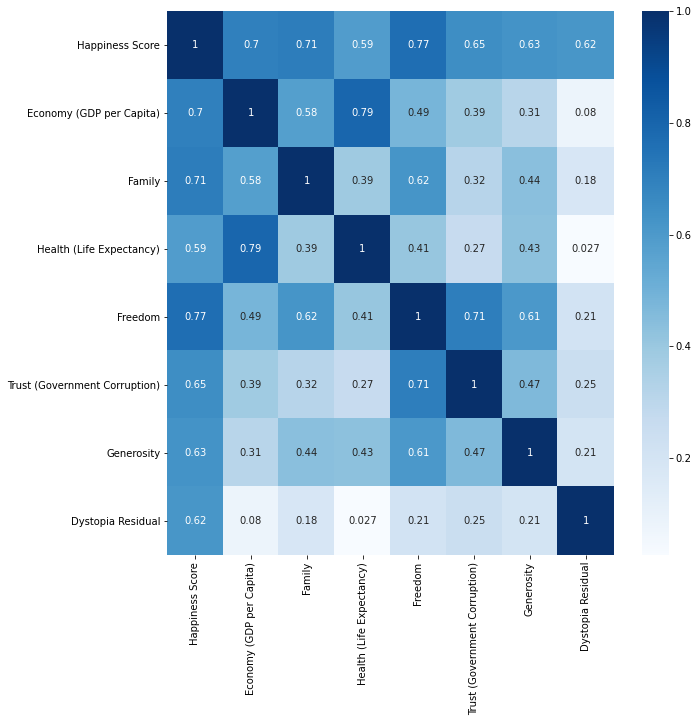

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corre.corr(), annot=True, cmap="Blues")

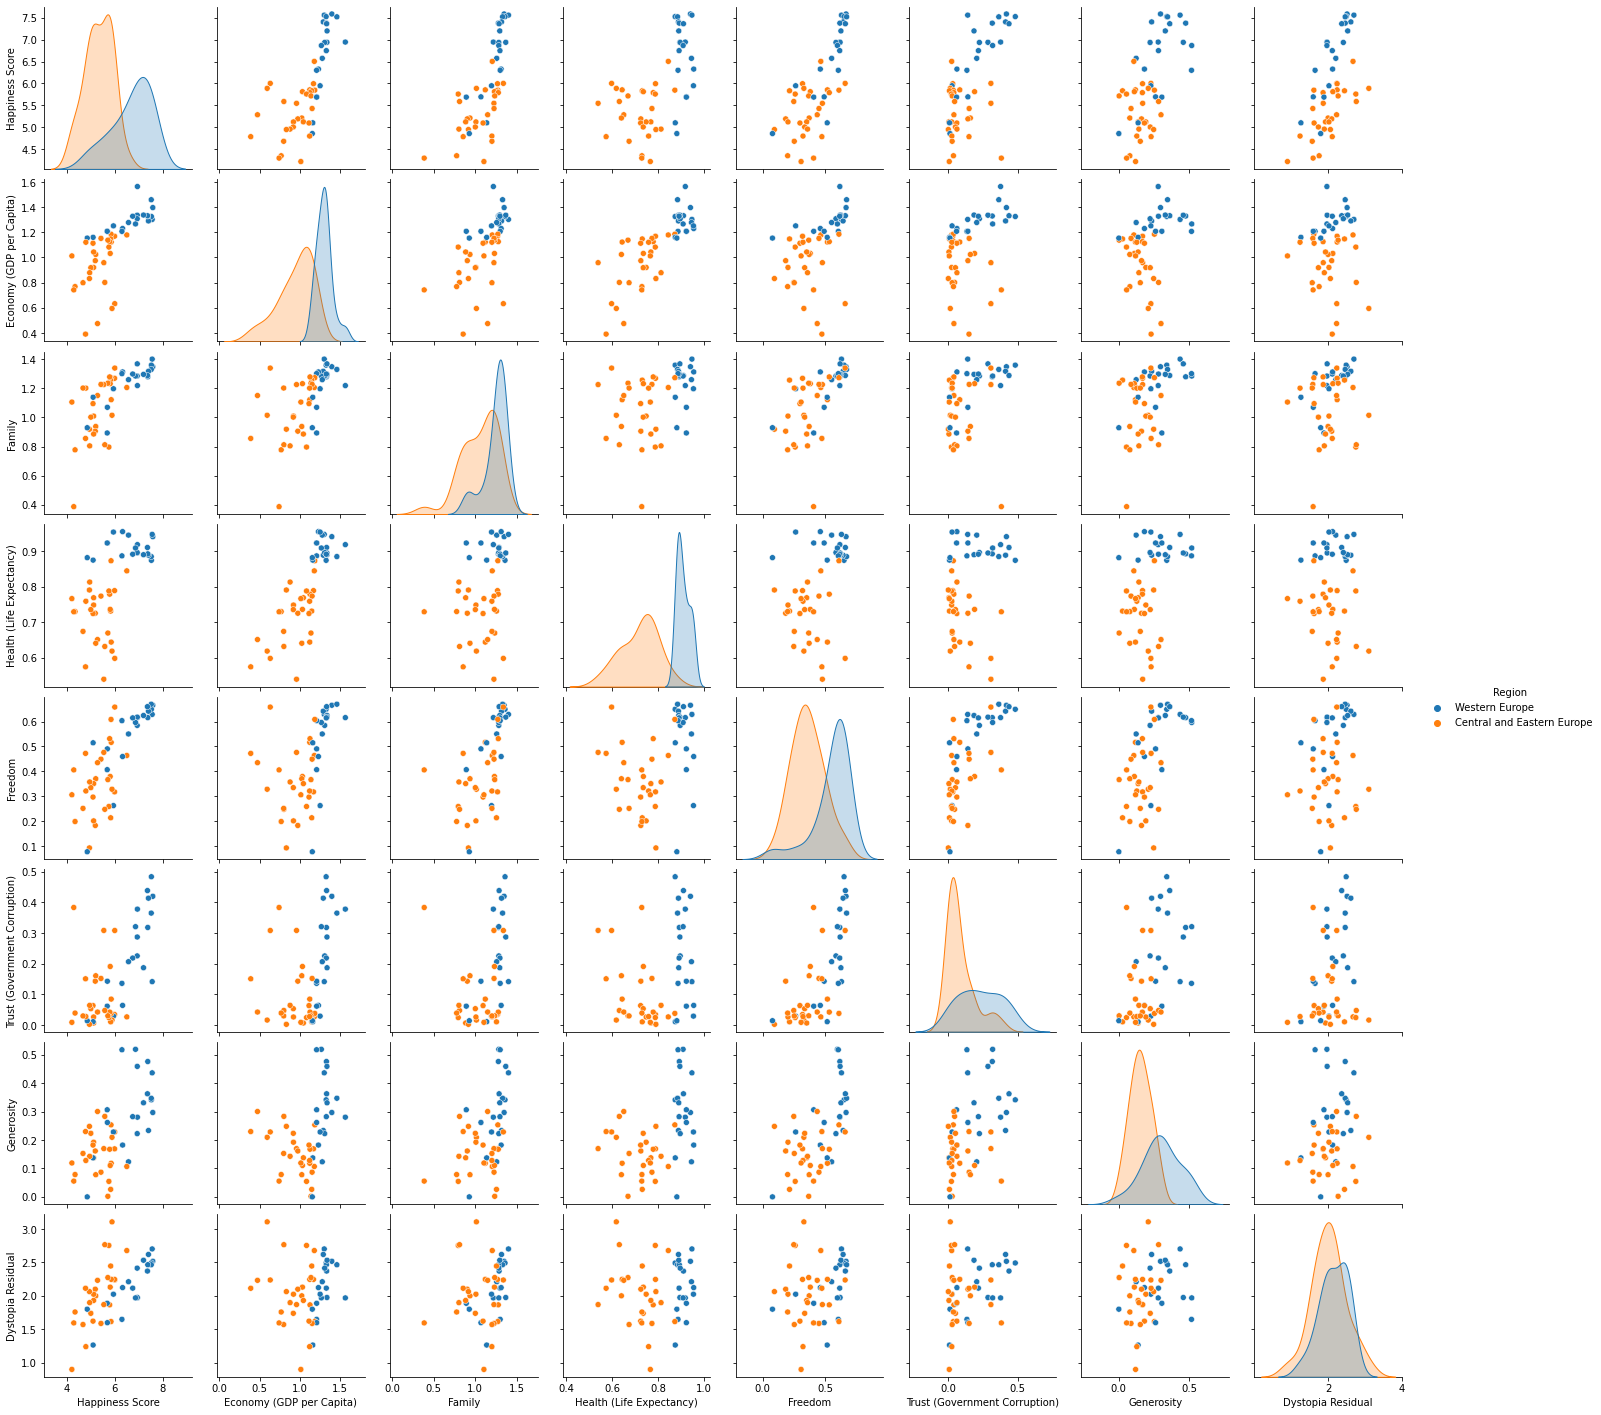

In [38]:
sns.pairplot(df_corre, hue= "Region" )

**Correlacion entre Salud y Economia**

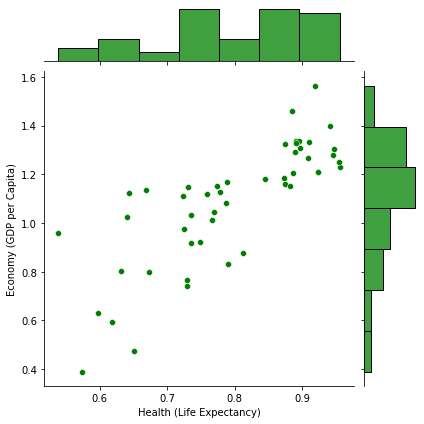

In [11]:
sns.jointplot(x = df["Health (Life Expectancy)"], y = df["Economy (GDP per Capita)"], color = "green")
#Correlacion directa entre la Salud y la Economia. 

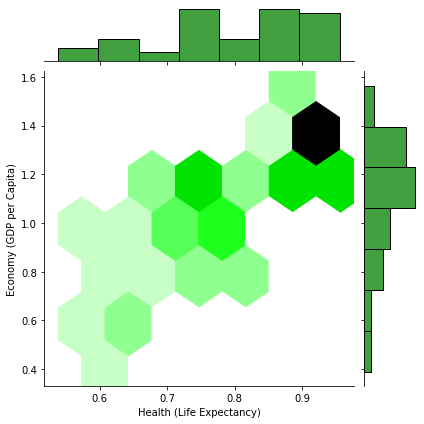

In [15]:
sns.jointplot(x = df["Health (Life Expectancy)"], y = df["Economy (GDP per Capita)"], color = "green", kind="hex")

In [40]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count       50.000000        50.000000       50.000000   
mean        58.220000         5.902740        0.042023   
std         36.939161         0.959684        0.010104   
min          1.000000         4.218000        0.018480   
25%         26.750000         5.123250        0.035327   
50%         59.500000         5.802000        0.041715   
75%         86.750000         6.706250        0.048215   
max        134.000000         7.587000        0.069130   

       Economy (GDP per Capita)     Family  Health (Life Expectancy)  \
count                 50.000000  50.000000                 50.000000   
mean                   1.092024   1.134631                  0.798731   
std                    0.250200   0.209165                  0.114382   
min                    0.390470   0.385620                  0.538860   
25%                    0.962448   1.004150                  0.729420   
50%                    1.149485   1.213030                  0.789915   
75%                    1.274927   1.285615                  0.892595   
max                    1.563910   1.402230                  0.955620   

         Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  
count  50.000000                      50.000000   50.000000          50.000000  
mean    0.438765                       0.147485    0.215199           2.075910  
std     0.166647                       0.142206    0.127240           0.434282  
min     0.076990                       0.002270    0.000000           0.899910  
25%     0.318412                       0.029720    0.124490           1.817170  
50%     0.454195                       0.074335    0.200910           2.081920  
75%     0.607325                       0.223657    0.282860           2.403928  
max     0.669730                       0.483570    0.519120           3.107120

### Relacion entre Economia y Generosidad

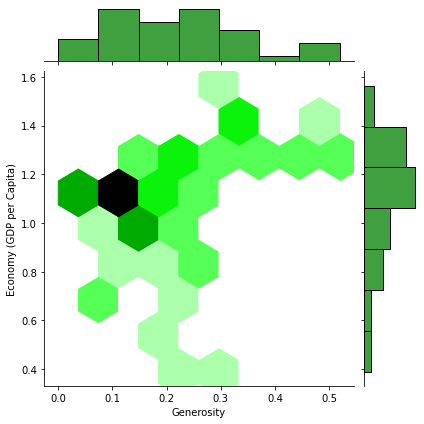

In [42]:
sns.jointplot(x = df["Generosity"], y = df["Economy (GDP per Capita)"], color = "green", kind="hex")

### Relacion entre Confianza en el estado y la Economia 

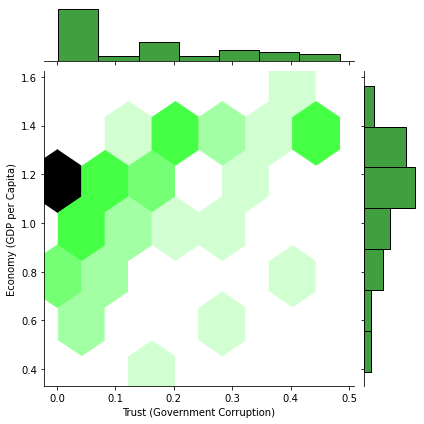

In [41]:
sns.jointplot(x = df["Trust (Government Corruption)"], y = df["Economy (GDP per Capita)"], color = "green", kind="hex")

### Relacion entre Confianza en el estado y Libertad

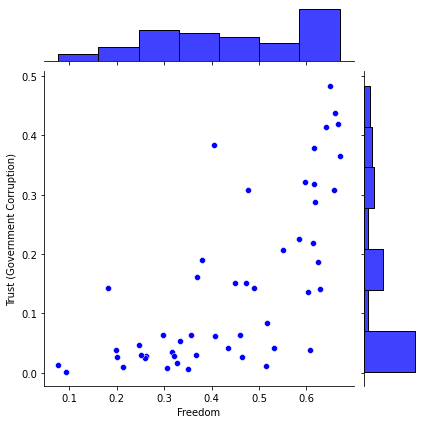

In [48]:
sns.jointplot(x = df["Freedom"], y = df["Trust (Government Corruption)"], color = "blue")

### Mapa felicidad Europa

In [46]:
m = folium.Map([40.42071093543832, 13.700319687355299], tiles="Stamen Terrain",zoom_start=4)

folium.Choropleth(
    geo_data=datos,
    data=df[["Country", "Happiness Score"]],
    columns=['Country', 'Happiness Score'],
    key_on='feature.properties.name',
    fill_color='PuBuGn', 
).add_to(m)

m

**Comparativa de Felicidad entre Regiones**

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

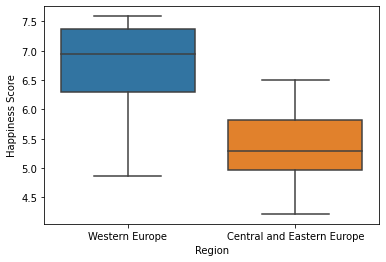

In [17]:
sns.boxplot( x= df["Region"], y= df["Happiness Score"])